In [1]:
!pip install -r requirements.txt

In [2]:
%pip install python-gnupg
%pip install eep153_tools

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd

import numpy as np

# Load the CSV files for Uganda
hh_characteristics_uganda_path = 'HH Characteristics_Uganda.csv'
expenditures_uganda_path = 'Expenditures (2019-20)_Uganda.csv'
prices_uganda_path = 'Prices_Uganda.csv'
fct_uganda_path = 'FCT_Uganda.csv'

# Read data from the CSV files
hh_characteristics_uganda_raw = pd.read_csv(hh_characteristics_uganda_path)
expenditures_uganda_raw = pd.read_csv(expenditures_uganda_path)
prices_uganda_raw = pd.read_csv(prices_uganda_path)
fct_uganda_raw = pd.read_csv(fct_uganda_path)

In [34]:
# Cleaning the household characteristics data for Uganda: Remove NAs and keep numeric 'i'
hh_characteristics_uganda_raw_cleaned = hh_characteristics_uganda_raw.dropna(subset=['m'])
hh_characteristics_uganda_raw_cleaned = hh_characteristics_uganda_raw_cleaned[hh_characteristics_uganda_raw_cleaned['i'].str.isnumeric()]

# Cleaning the food expenditures data for Uganda: Remove NAs and keep numeric 'i'
expenditures_uganda_raw_cleaned = expenditures_uganda_raw.dropna(subset=['m'])
expenditures_uganda_raw_cleaned = expenditures_uganda_raw_cleaned[expenditures_uganda_raw_cleaned['i'].str.isnumeric()]

In [35]:
# Filter the household characteristics data for Uganda to keep only rows from 2019-20
hh_characteristics_uganda_2019_20 = hh_characteristics_uganda_raw_cleaned[
    hh_characteristics_uganda_raw_cleaned['t'] == '2019-20'
]

# Display the filtered DataFrame
hh_characteristics_uganda_2019_20.head()

i        t        m  F 00-03  F 04-08  F 09-13  F 14-18  F 19-30  \
18  1013000201  2019-20  Central      0.0      0.0      0.0      0.0      0.0   
24  1013000202  2019-20  Central      0.0      1.0      0.0      0.0      0.0   
32  1013000204  2019-20  Central      0.0      0.0      0.0      0.0      0.0   
44  1013000210  2019-20  Central      0.0      0.0      0.0      0.0      0.0   
66  1021000108  2019-20  Central      0.0      0.0      0.0      0.0      0.0   

    F 31-50  F 51+  M 00-03  M 04-08  M 09-13  M 14-18  M 19-30  M 31-50  \
18      0.0    1.0      0.0      0.0      0.0      0.0      0.0      0.0   
24      0.0    1.0      0.0      1.0      0.0      0.0      0.0      0.0   
32      0.0    0.0      0.0      0.0      0.0      0.0      0.0      1.0   
44      0.0    0.0      0.0      0.0      0.0      0.0      0.0      1.0   
66      0.0    1.0      0.0      0.0      0.0      0.0      0.0      0.0   

    M 51+  log HSize  
18    0.0   0.000000  
24    0.0   1.098612  
32    0.0   0.000000  
44    0.0   0.000000  
66    1.0   0.693147

In [36]:
expenditures_uganda_raw_cleaned.head()

i        t        m   Beans     Beef     Beer  Biscuits  Bongo  \
4  1013000201  2019-20  Central     NaN      NaN  17500.0       NaN    NaN   
5  1013000202  2019-20  Central  5250.0      NaN      NaN       NaN    NaN   
6  1013000204  2019-20  Central     NaN      NaN   7000.0       NaN    NaN   
7  1013000210  2019-20  Central     NaN      NaN      NaN       NaN    NaN   
8  1021000108  2019-20  Central  1000.0  12000.0      NaN       NaN    NaN   

   Bread  Butter, etc.  ...  Sugarcane  Sweet Bananas  Sweet Potatoes    Tea  \
4    NaN           NaN  ...        NaN         2000.0             NaN  400.0   
5    NaN           NaN  ...        NaN            NaN          2000.0  100.0   
6    NaN           NaN  ...        NaN            NaN             NaN    NaN   
7    NaN           NaN  ...        NaN            NaN             NaN    NaN   
8    NaN           NaN  ...        NaN            NaN             NaN  200.0   

   Tomatoes  Waragi  Water  Wheat (flour)    Yam  Yogurt  
4    2100.0     NaN    NaN            NaN    NaN     NaN  
5     200.0     NaN    NaN            NaN    NaN     NaN  
6    2100.0  8000.0    NaN            NaN    NaN     NaN  
7       NaN     NaN    NaN            NaN    NaN     NaN  
8     500.0     NaN    NaN            NaN  500.0     NaN  

[5 rows x 77 columns]

In [37]:
# Function to clean MultiIndex DataFrames
def clean_multiindex_df_uganda(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str, col)).strip() for col in df.columns.values]
    else:
        df.columns = [col.strip() for col in df.columns.tolist()]
    
    df = df.loc[:, ~df.columns.duplicated(keep='first')]
    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)
    df = df.loc[~df.index.duplicated(), :]
    
    return df

# Cleaning the DataFrames
uganda_household_characteristics_cleaned = clean_multiindex_df_uganda(hh_characteristics_uganda_2019_20)
uganda_food_expenditures_cleaned = clean_multiindex_df_uganda(expenditures_uganda_raw_cleaned)

In [38]:
uganda_household_characteristics_cleaned.head()

i        t        m  F 00-03  F 04-08  F 09-13  F 14-18  F 19-30  \
18  1013000201  2019-20  Central      0.0      0.0      0.0      0.0      0.0   
24  1013000202  2019-20  Central      0.0      1.0      0.0      0.0      0.0   
32  1013000204  2019-20  Central      0.0      0.0      0.0      0.0      0.0   
44  1013000210  2019-20  Central      0.0      0.0      0.0      0.0      0.0   
66  1021000108  2019-20  Central      0.0      0.0      0.0      0.0      0.0   

    F 31-50  F 51+  M 00-03  M 04-08  M 09-13  M 14-18  M 19-30  M 31-50  \
18      0.0    1.0      0.0      0.0      0.0      0.0      0.0      0.0   
24      0.0    1.0      0.0      1.0      0.0      0.0      0.0      0.0   
32      0.0    0.0      0.0      0.0      0.0      0.0      0.0      1.0   
44      0.0    0.0      0.0      0.0      0.0      0.0      0.0      1.0   
66      0.0    1.0      0.0      0.0      0.0      0.0      0.0      0.0   

    M 51+  log HSize  
18    0.0   0.000000  
24    0.0   1.098612  
32    0.0   0.000000  
44    0.0   0.000000  
66    1.0   0.693147

In [39]:
uganda_food_expenditures_cleaned.head()

i        t        m   Beans     Beef     Beer  Biscuits  Bongo  \
4  1013000201  2019-20  Central     NaN      NaN  17500.0       NaN    NaN   
5  1013000202  2019-20  Central  5250.0      NaN      NaN       NaN    NaN   
6  1013000204  2019-20  Central     NaN      NaN   7000.0       NaN    NaN   
7  1013000210  2019-20  Central     NaN      NaN      NaN       NaN    NaN   
8  1021000108  2019-20  Central  1000.0  12000.0      NaN       NaN    NaN   

   Bread  Butter, etc.  ...  Sugarcane  Sweet Bananas  Sweet Potatoes    Tea  \
4    NaN           NaN  ...        NaN         2000.0             NaN  400.0   
5    NaN           NaN  ...        NaN            NaN          2000.0  100.0   
6    NaN           NaN  ...        NaN            NaN             NaN    NaN   
7    NaN           NaN  ...        NaN            NaN             NaN    NaN   
8    NaN           NaN  ...        NaN            NaN             NaN  200.0   

   Tomatoes  Waragi  Water  Wheat (flour)    Yam  Yogurt  
4    2100.0     NaN    NaN            NaN    NaN     NaN  
5     200.0     NaN    NaN            NaN    NaN     NaN  
6    2100.0  8000.0    NaN            NaN    NaN     NaN  
7       NaN     NaN    NaN            NaN    NaN     NaN  
8     500.0     NaN    NaN            NaN  500.0     NaN  

[5 rows x 77 columns]

In [40]:
# Adding 'm' if not present and setting indices
if 'm' not in uganda_food_expenditures_cleaned.columns:
    uganda_food_expenditures_cleaned['m'] = 1

uganda_food_expenditures_indexed = uganda_food_expenditures_cleaned.set_index(['i', 't', 'm'])
uganda_food_expenditures_indexed.columns.name = 'j'
uganda_food_expenditures_indexed = uganda_food_expenditures_indexed.apply(pd.to_numeric, errors='coerce').replace(0, np.nan)

if 'm' not in uganda_household_characteristics_cleaned.columns:
    uganda_household_characteristics_cleaned['m'] = 1

uganda_household_characteristics_indexed = uganda_household_characteristics_cleaned.set_index(['i', 't', 'm'])
uganda_household_characteristics_indexed.columns.name = 'j'
uganda_household_characteristics_indexed = uganda_household_characteristics_indexed.apply(pd.to_numeric, errors='coerce')

In [41]:
uganda_food_expenditures_indexed.head()

j                            Beans     Beef     Beer  Biscuits  Bongo  Bread  \
i          t       m                                                           
1013000201 2019-20 Central     NaN      NaN  17500.0       NaN    NaN    NaN   
1013000202 2019-20 Central  5250.0      NaN      NaN       NaN    NaN    NaN   
1013000204 2019-20 Central     NaN      NaN   7000.0       NaN    NaN    NaN   
1013000210 2019-20 Central     NaN      NaN      NaN       NaN    NaN    NaN   
1021000108 2019-20 Central  1000.0  12000.0      NaN       NaN    NaN    NaN   

j                           Butter, etc.  Cabbages  Cake  Cassava  ...  \
i          t       m                                               ...   
1013000201 2019-20 Central           NaN       NaN   NaN   4000.0  ...   
1013000202 2019-20 Central           NaN       NaN   NaN   1000.0  ...   
1013000204 2019-20 Central           NaN       NaN   NaN      NaN  ...   
1013000210 2019-20 Central           NaN       NaN   NaN      NaN  ...   
1021000108 2019-20 Central           NaN       NaN   NaN   3500.0  ...   

j                           Sugarcane  Sweet Bananas  Sweet Potatoes    Tea  \
i          t       m                                                          
1013000201 2019-20 Central        NaN         2000.0             NaN  400.0   
1013000202 2019-20 Central        NaN            NaN          2000.0  100.0   
1013000204 2019-20 Central        NaN            NaN             NaN    NaN   
1013000210 2019-20 Central        NaN            NaN             NaN    NaN   
1021000108 2019-20 Central        NaN            NaN             NaN  200.0   

j                           Tomatoes  Waragi  Water  Wheat (flour)    Yam  \
i          t       m                                                        
1013000201 2019-20 Central    2100.0     NaN    NaN            NaN    NaN   
1013000202 2019-20 Central     200.0     NaN    NaN            NaN    NaN   
1013000204 2019-20 Central    2100.0  8000.0    NaN            NaN    NaN   
1013000210 2019-20 Central       NaN     NaN    NaN            NaN    NaN   
1021000108 2019-20 Central     500.0     NaN    NaN            NaN  500.0   

j                           Yogurt  
i          t       m                
1013000201 2019-20 Central     NaN  
1013000202 2019-20 Central     NaN  
1013000204 2019-20 Central     NaN  
1013000210 2019-20 Central     NaN  
1021000108 2019-20 Central     NaN  

[5 rows x 74 columns]

In [42]:
uganda_household_characteristics_indexed.head()

j                           F 00-03  F 04-08  F 09-13  F 14-18  F 19-30  \
i          t       m                                                      
1013000201 2019-20 Central      0.0      0.0      0.0      0.0      0.0   
1013000202 2019-20 Central      0.0      1.0      0.0      0.0      0.0   
1013000204 2019-20 Central      0.0      0.0      0.0      0.0      0.0   
1013000210 2019-20 Central      0.0      0.0      0.0      0.0      0.0   
1021000108 2019-20 Central      0.0      0.0      0.0      0.0      0.0   

j                           F 31-50  F 51+  M 00-03  M 04-08  M 09-13  \
i          t       m                                                    
1013000201 2019-20 Central      0.0    1.0      0.0      0.0      0.0   
1013000202 2019-20 Central      0.0    1.0      0.0      1.0      0.0   
1013000204 2019-20 Central      0.0    0.0      0.0      0.0      0.0   
1013000210 2019-20 Central      0.0    0.0      0.0      0.0      0.0   
1021000108 2019-20 Central      0.0    1.0      0.0      0.0      0.0   

j                           M 14-18  M 19-30  M 31-50  M 51+  log HSize  
i          t       m                                                     
1013000201 2019-20 Central      0.0      0.0      0.0    0.0   0.000000  
1013000202 2019-20 Central      0.0      0.0      0.0    0.0   1.098612  
1013000204 2019-20 Central      0.0      0.0      1.0    0.0   0.000000  
1013000210 2019-20 Central      0.0      0.0      1.0    0.0   0.000000  
1021000108 2019-20 Central      0.0      0.0      0.0    1.0   0.693147

## Demand Analysis

In [43]:
import cfe
import numpy as np

# Create a regression model for Uganda
uganda_regression_model = cfe.Regression(y=np.log(uganda_food_expenditures_indexed.stack()), d=uganda_household_characteristics_indexed)

# Get and sort regression coefficients for Uganda
uganda_sorted_coefficients = uganda_regression_model.get_beta().sort_values(ascending=False)

# Save the Uganda model to a file
uganda_regression_model.to_pickle('uganda_model_results.pickle')

In [45]:
uganda_loaded_regression_model = cfe.read_pickle('uganda_model_results.pickle')

In [46]:
from cfe import regression as regression_tools

# Load Uganda regression results from a pickle file
uganda_regression_results = regression_tools.read_pickle('uganda_model_results.pickle')
uganda_predicted_expenditures = uganda_loaded_regression_model.predicted_expenditures()
uganda_predicted_prices = np.exp(uganda_regression_results.get_Ar())

In [49]:
uganda_predicted_prices.head(20)

t        m        j            
2019-20  Central  Beans            0.901047
                  Beef             1.108493
                  Bread            0.971843
                  Cabbages         0.950011
                  Cassava          0.853108
                  Chapati          1.181763
                  Cooking Oil      0.951084
                  Dodo             1.209391
                  Eggs             1.005872
                  Fish (dried)     0.841694
                  Fish (fresh)     1.001616
                  Ground Nuts      1.086082
                  Jam/Marmalade    0.989397
                  Maize            0.970652
                  Mangos           0.894063
                  Matoke           1.154398
                  Milk (fresh)     0.886814
                  Millet           0.936554
                  Onions           1.168694
                  Oranges          0.855898
Name: Ar, dtype: float64

In [48]:
# Displaying sorted coefficients and predicted prices for Uganda
print("Sorted Regression Coefficients:", uganda_sorted_coefficients.head())
print("Predicted Prices for Uganda:", uganda_predicted_prices.head())

Sorted Regression Coefficients: j
Fish (fresh)    0.988382
Milk (fresh)    0.771784
Mangos          0.683221
Other Fruits    0.680745
Soda            0.676216
Name: beta, dtype: float64
Predicted Prices for Uganda: t        m        j       
2019-20  Central  Beans       0.901047
                  Beef        1.108493
                  Bread       0.971843
                  Cabbages    0.950011
                  Cassava     0.853108
Name: Ar, dtype: float64


In [51]:
uganda_reference_prices = uganda_predicted_prices.xs("2019-20", level='t').groupby('j').mean()

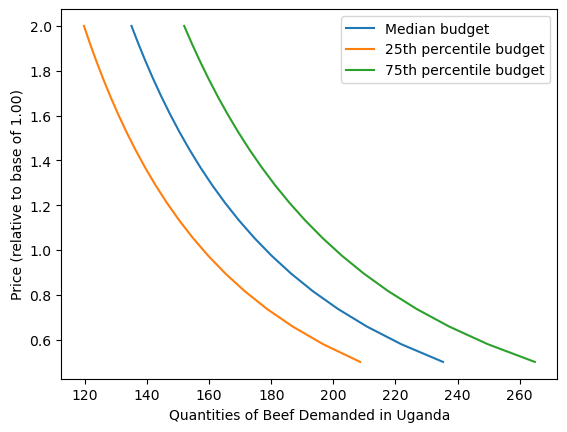

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Correcting the name of the product for Uganda
uganda_desired_good = 'Beef'  # Example, replace 'Beef' with the actual name as it appears in your Uganda dataset

# Scale for adjusting prices
uganda_price_scale = np.linspace(0.5, 2, 20)

# Total food expenditures per household in Uganda
uganda_total_expenditures = uganda_predicted_expenditures.groupby(['i', 't', 'm']).sum()

# Reference budget for households in Uganda
uganda_median_budget = uganda_total_expenditures.quantile(0.5)  # Median budget

# Reference prices for goods in Uganda for the latest year available
uganda_reference_prices = uganda_predicted_prices.xs("2019-20", level='t').groupby('j').mean()  # Replace 'latest_year' with the actual latest year available, e.g., '2019'

def adjust_uganda_prices(new_price, prices=uganda_reference_prices, good=uganda_desired_good):
    """
    Adjusts the price of a specific good in Uganda, holding other prices constant.
    """
    adjusted_prices = prices.copy()
    adjusted_prices.loc[good] = new_price
    return adjusted_prices

# Plotting demand curves for households at different expenditure levels in Uganda

# Demand for the specified good at median budget
plt.plot(
    [uganda_regression_results.demands(uganda_median_budget, adjust_uganda_prices(uganda_reference_prices[uganda_desired_good] * scale))[uganda_desired_good] for scale in uganda_price_scale],
    uganda_price_scale,
    label='Median budget'
)

# Demand for the specified good at 25th percentile budget
plt.plot(
    [uganda_regression_results.demands(uganda_total_expenditures.quantile(0.25), adjust_uganda_prices(uganda_reference_prices[uganda_desired_good] * scale))[uganda_desired_good] for scale in uganda_price_scale],
    uganda_price_scale,
    label='25th percentile budget'
)

# Demand for the specified good at 75th percentile budget
plt.plot(
    [uganda_regression_results.demands(uganda_total_expenditures.quantile(0.75), adjust_uganda_prices(uganda_reference_prices[uganda_desired_good] * scale))[uganda_desired_good] for scale in uganda_price_scale],
    uganda_price_scale,
    label='75th percentile budget'
)

plt.ylabel(f"Price (relative to base of {uganda_reference_prices[uganda_desired_good]:.2f})")
plt.xlabel(f"Quantities of {uganda_desired_good} Demanded in Uganda")
plt.legend()
plt.show()